# <snap style="color:#579676"> 3nd project: GRE Admission Prediction </span>

### <snap style="color:red"> Regression Problem: </snap>


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Imoprting Libraries

In [2]:
import pandas as pd
import matplotlib as plt
import numpy as np

## Loading Dataset

In [3]:
df = pd.read_csv("../data/Admission_Predict_Ver1.1.csv")
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
df = df.iloc[ : ,1:]
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


## Exploring Dataset

In [5]:
df.shape

(500, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [7]:
df.duplicated().sum()

0

## Splitting into dependent and independent variables

In [8]:
# X = df.drop(columns=["Serial No.", "Chance of Admit"], axis=1)
X = df.iloc[:,0:-1]
y = df.iloc[:,-1]


In [9]:
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1
496,337,117,5,5.0,5.0,9.87,1
497,330,120,5,4.5,5.0,9.56,1
498,312,103,4,4.0,5.0,8.43,0


In [10]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit , Length: 500, dtype: float64

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 2)

## Scalling the data

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [13]:
X_train_scaled

array([[0.4893617 , 0.37037037, 0.25      , ..., 0.875     , 0.62179487,
        0.        ],
       [0.29787234, 0.44444444, 0.25      , ..., 0.875     , 0.42307692,
        1.        ],
       [0.65957447, 0.7037037 , 0.75      , ..., 0.375     , 0.41666667,
        1.        ],
       ...,
       [0.14893617, 0.07407407, 0.25      , ..., 0.125     , 0.45512821,
        1.        ],
       [0.44680851, 0.44444444, 0.5       , ..., 0.375     , 0.48076923,
        0.        ],
       [0.        , 0.14814815, 0.25      , ..., 0.75      , 0.32051282,
        1.        ]])

## Model

In [14]:
import tensorflow
from tensorflow import keras
from keras import layers
from keras import Sequential
from keras.layers import Dense


2023-09-24 12:03:03.770839: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-24 12:03:04.684277: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-24 12:03:04.688336: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-24 12:03:07.946836: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [15]:
model = Sequential()
model.add(Dense(7, activation="relu", input_dim=7)) # we merged input and hidden layer. 
# Rather than adding an input layer we wrote input_dim, means number of inputs.
model.add(Dense(7, activation="relu"))
model.add(Dense(1, activation="linear")) # always linear for regression problem

**Activation is Always linear for regression problem in the output layer**

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 7)                 56        
                                                                 
 dense_1 (Dense)             (None, 7)                 56        
                                                                 
 dense_2 (Dense)             (None, 1)                 8         
                                                                 
Total params: 120 (480.00 Byte)
Trainable params: 120 (480.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
model.compile(loss="mean_squared_error", optimizer="Adam")

In [18]:
history = model.fit(X_train_scaled, y_train, epochs=50, validation_split=0.2)

Epoch 1/50
10/10 [==============================] - 1s 24ms/step - loss: 0.1494 - val_loss: 0.0908
Epoch 2/50
10/10 [==============================] - 0s 5ms/step - loss: 0.0648 - val_loss: 0.0488
Epoch 3/50
10/10 [==============================] - 0s 4ms/step - loss: 0.0498 - val_loss: 0.0455
Epoch 4/50
10/10 [==============================] - 0s 5ms/step - loss: 0.0469 - val_loss: 0.0408
Epoch 5/50
10/10 [==============================] - 0s 5ms/step - loss: 0.0408 - val_loss: 0.0371
Epoch 6/50
10/10 [==============================] - 0s 4ms/step - loss: 0.0362 - val_loss: 0.0350
Epoch 7/50
10/10 [==============================] - 0s 4ms/step - loss: 0.0325 - val_loss: 0.0317
Epoch 8/50
10/10 [==============================] - 0s 4ms/step - loss: 0.0291 - val_loss: 0.0289
Epoch 9/50
10/10 [==============================] - 0s 4ms/step - loss: 0.0262 - val_loss: 0.0270
Epoch 10/50
10/10 [==============================] - 0s 7ms/step - loss: 0.0238 - val_loss: 0.0255
Epoch 11/50
10/10 

In [19]:
y_pred = model.predict(X_test_scaled)

4/4 [==============================] - 0s 1ms/step


In [20]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.6414386913123509

In [21]:
import matplotlib.pyplot as plt


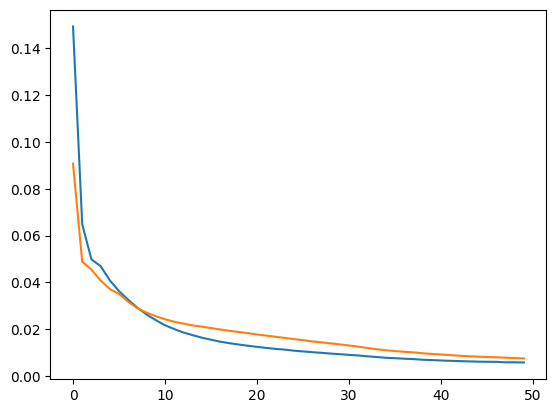

In [22]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])